In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


read_file = open('co2a0000365.txt', 'r')

# for line in read_file:
# channels=[]
read_file.readline()
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975'])

matriz =  np.matrix(np.empty(shape=(0,4)))
user = []
alcoholic=[]
paradigm=[]
replication=[]
channel=[]


for cont in range(8):
  
    firstline = read_file.readline().split("  ")
    lineeg=[]
    
    for i in range(len(firstline)-1):
        
        if i==0:
            user.append(float(firstline[i]))
        elif i==1:
            alcoholic.append(firstline[i])
             
        elif i==2:
            
            paradigm.append(firstline[i])
             
        if i==3:
            
            replication.append(float(firstline[i]))
        elif i>=4:
            if i==4:
                channelline=firstline[i].split(" ")
                channel.append(channelline[0])
                lineeg.append(float(channelline[1]))
             
            else:
                lineeg.append(float(firstline[i]))

   # matriz= np.insert(matriz,j,line,axis=0)
    datachannel = pd.DataFrame(lineeg)
    min = datachannel.min()
    max = datachannel.max()
    sd = datachannel.std()
    mean = datachannel.mean()
    quantil0=datachannel.quantile(.025)
    quantil1=datachannel.quantile(.25)
    median=datachannel.quantile(.5)
    quantil3=datachannel.quantile(.75)
    quantil4=datachannel.quantile(.975)
    iqr=quantil3[0]-quantil1[0]
    
    df.loc[cont]=[user[cont],alcoholic[cont],paradigm[cont],replication[cont],channel[cont],min[0],max[0],
                  sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
 
   
print(df)
    


    


   user_id alcoholic    paradigm  replication Channel     Min     Max  \
0    365.0         a  S2matcherr          3.0     FP1 -34.302  10.620   
1    365.0         a  S2matcherr          3.0     FP2 -20.243  15.889   
2    365.0         a  S2matcherr          3.0      F7 -36.112   2.950   
3    365.0         a  S2matcherr          3.0      F8 -20.081   9.216   
4    365.0         a  S2matcherr          3.0     AF1 -20.477   9.308   
5    365.0         a  S2matcherr          3.0     AF2 -14.394  12.950   
6    365.0         a  S2matcherr          3.0      FZ -13.326   7.670   
7    365.0         a  S2matcherr          3.0      F4 -11.831  30.650   

          Sd       Mean  Median       IQR   0.025    0.25     0.5      0.75  \
0  11.718854 -15.407539 -17.212  20.99600 -32.349 -25.513 -17.212  -4.51700   
1   6.962243  -4.957852  -5.595  10.86425 -16.825 -10.478  -5.595   0.38625   
2  10.863673 -17.243051 -16.581  20.14200 -33.793 -27.934 -16.581  -7.79200   
3   5.949437  -7.541672  -

## Separar columnes


In [68]:
from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separar les variables explicatives
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)


[[-3.43020000e+01  1.06200000e+01  1.17188537e+01 -1.54075391e+01
  -1.72120000e+01  2.09960000e+01 -3.23490000e+01 -2.55130000e+01
  -1.72120000e+01 -4.51700000e+00  4.76100000e+00]
 [-2.02430000e+01  1.58890000e+01  6.96224298e+00 -4.95785156e+00
  -5.59500000e+00  1.08642500e+01 -1.68250000e+01 -1.04780000e+01
  -5.59500000e+00  3.86250000e-01  7.58900000e+00]
 [-3.61120000e+01  2.95000000e+00  1.08636725e+01 -1.72430508e+01
  -1.65810000e+01  2.01420000e+01 -3.37930000e+01 -2.79340000e+01
  -1.65810000e+01 -7.79200000e+00  3.25625000e-01]
 [-2.00810000e+01  9.21600000e+00  5.94943685e+00 -7.54167187e+00
  -7.87400000e+00  9.27700000e+00 -1.79440000e+01 -1.22680000e+01
  -7.87400000e+00 -2.99100000e+00  2.86900000e+00]
 [-2.04770000e+01  9.30800000e+00  7.26465084e+00 -5.90511719e+00
  -6.80500000e+00  1.22080000e+01 -1.83410000e+01 -1.21770000e+01
  -6.80500000e+00  3.10000000e-02  7.17162500e+00]
 [-1.43940000e+01  1.29500000e+01  5.08491913e+00 -1.53669922e+00
  -1.21100000e+00  

## PCA

In [69]:

# mantenir dos components
pca = PCA(n_components=8)
# trasformar les variables explicatives
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4','component 5','component 1', 'component 2','component 3'])
principalDf

,component 1,component 2,component 3,component 4,component 5,component 1,component 2,component 3
0,3.906186,1.595336,0.237244,-0.207300,-0.055325,-0.008080,-0.001479,5.213765e-17
1,-0.625498,-0.389151,0.496232,0.099888,0.020793,0.025975,0.014848,5.213765e-17
2,4.629810,0.674497,-0.323219,0.222393,0.026990,-0.016216,0.003518,5.213765e-17
3,0.282829,-1.408270,0.200341,-0.094065,0.075145,-0.022128,-0.013179,5.213765e-17
4,-0.009945,-0.502885,-0.238298,-0.024858,-0.007778,0.075640,-0.007564,5.213765e-17
5,-2.152988,-1.498465,0.082455,0.196107,-0.071203,-0.024565,-0.007745,5.213765e-17
6,-1.536326,-1.879680,-0.353343,-0.193538,-0.006540,-0.020497,0.012810,5.213765e-17
7,-4.494069,3.408619,-0.101414,0.001373,0.017917,-0.010129,-0.001210,5.213765e-17


## Drawing

In [70]:
pca.explained_variance_ratio_

array([7.31330417e-01, 2.58919066e-01, 7.33930712e-03, 2.13399939e-03,
       1.74576831e-04, 9.47759518e-05, 7.85737579e-06, 2.47121313e-34])

In [71]:
df_1 = pd.DataFrame(x, columns=features)

# data normalitzada
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=8)
pca.fit_transform(data_scaled)

# components relacionats amb les variables explicatives
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-1','PC-2','PC-3','PC-4'])


,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,-0.341857,-0.260137,0.144948,-0.350270,-0.350653,0.158569,-0.339024,-0.348130,-0.350653,-0.304087,-0.268523
PC-2,-0.134291,0.372461,0.539428,0.063946,-0.025848,0.526757,-0.161591,-0.091620,-0.025848,0.296990,0.382949
PC-3,-0.167822,0.865098,-0.148277,-0.121001,-0.138622,-0.297173,-0.014143,0.013845,-0.138622,-0.214004,-0.117818
PC-4,-0.497590,0.027914,0.019233,-0.048927,0.560567,0.054123,-0.072993,-0.214890,0.560567,-0.221716,-0.129601
PC-1,0.397152,0.164026,-0.337485,0.143826,0.096020,0.348201,-0.572935,-0.089193,0.096020,0.161174,-0.422981
PC-2,-0.292747,-0.101904,-0.463509,0.253410,-0.067926,-0.118837,-0.466240,0.027819,-0.067926,-0.058225,0.616412
PC-3,-0.379900,-0.072582,0.303519,0.503279,-0.075227,-0.276177,-0.221431,0.379360,-0.075227,0.251005,-0.401812
PC-4,0.206109,0.003050,0.217200,0.144464,-0.065228,0.230341,-0.129512,0.501402,0.129501,-0.736993,0.063608


In [48]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

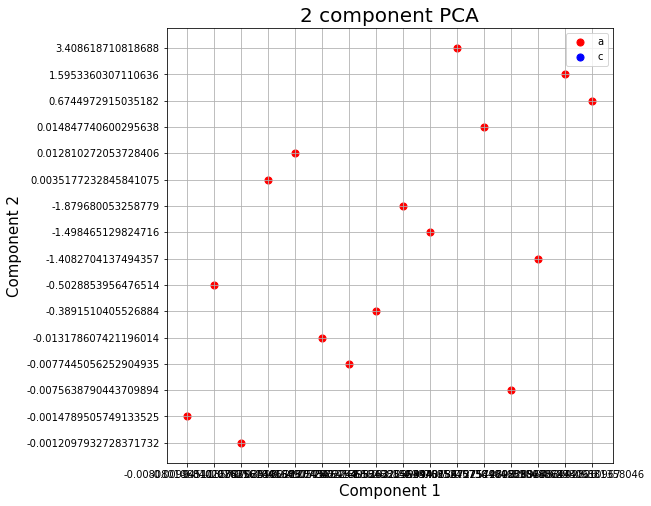

In [73]:
# Visualitzacio dels 2 components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()